In [452]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#vom 25.10.2025
#based on Application of a dynamic method of minimisation in the study of reaction surfaces by Colin M. Smith

In [453]:
#example from How to Find a Saddle Point by COLIN M. SMITH
#saddlepoint at 0,0
def f(x,y):
    return np.exp(- x**2) - np.exp(- y ** 2)

def dfx(x,y):
    return -2 * np.exp(- x**2) * x

def dfy(x,y):
    return 2 * np.exp(- y**2) * y

def ddfxx(x,y):
    return (4 * x**2 - 2) * np.exp(- x**2)

def ddfyy(x,y):
    return -(4 * y**2 - 2) * np.exp(- y ** 2)

def ddfxy(x,y):
    return 0

def ddfyx(x,y):
    return 0

    

In [454]:
#saddlepoint at 0,0
def f(x,y):
    return x**2 - y**2

def dfx(x,y):
    return 2 * x

def dfy(x,y):
    return -2 * y

def ddfxx(x,y):
    return 2

def ddfyy(x,y):
    return -2

def ddfxy(x,y):
    return 0

def ddfyx(x,y):
    return 0

In [455]:
#mult saddle points f(x,y) = cos(x) + cos(y)
def f(x,y):
    return np.cos(x) + np.cos(y)

def dfx(x,y):
    return -np.sin(x)

def dfy(x,y):
    return -np.sin(y)

def ddfxx(x,y):
    return -np.cos(x)

def ddfyy(x,y):
    return -np.cos(x)

def ddfxy(x,y):
    return 0

def ddfyx(x,y):
    return 0

In [456]:

#more complex: f(x,y)=sin(x) y+sin(y) x
# saddle at 0,0
# if you start at an maximum it will stay there (4.9, -4.9)
def f(x,y):
    return np.sin(x) * y + np.sin(y) * x

def dfx(x,y):
    return y*np.cos(x) + np.sin(y)

def dfy(x,y):
    return np.sin(x) + x*np.cos(y)

def ddfxx(x,y):
    return -y * np.sin(x)

def ddfyy(x,y):
    return -x * np.sin(y)

def ddfxy(x,y):
    return np.cos(x) + np.cos(y)

def ddfyx(x,y):
    return np.cos(x) + np.cos(y)

In [457]:
def gradient(x,y):
    g = [dfx(x,y),dfy(x,y)]
    return np.array(g)
def hessian(x,y):
    H = [[ddfxx(x,y),ddfxy(x,y)],
        [ddfyx(x,y),ddfyy(x,y)]]
    return np.array(H)

g = gradient(0.5,1.0)
H = hessian(0.5,1.0)
eigs = np.linalg.eigvals(H)
print(eigs)
print(ddfxx(0.5,1.0),ddfyy(0.5,1.0))




[-1.86826902  0.96810799]
-0.479425538604203 -0.42073549240394825


In [462]:
x, y = 4.5,-4.5
#x, y = np.random.uniform(-5, 5, 2)

step = 0.1
path = [(x,y)]
for i in range (10000):
    g = gradient(x,y)
    H = hessian(x,y)
    eigs = np.linalg.eigvals(H)
    idx = np.argmin(eigs)
    
    #reflect at smallets eigenvalue
    g[idx] = -g[idx]
    x = x - step * g[0]
    y = y - step * g[1]
    
    path.append((x, y))
    #print(i,idx,x,y)
    
path = np.array(path)
print(path[-1],gradient(*path[-1]))

[ 4.91318044 -4.91318044] [0. 0.]


In [460]:
x, y = 4.9,-5
x, y = np.random.uniform(-5, 5, 2)
step = 0.2
path = [(x,y)]
for i in range (10000):
    g = gradient(x,y)
    H = hessian(x,y)
    u, U = np.linalg.eig(H)
    idx = np.argmin(u)
    
    #find principal gradients
    g_p = U.T @ g
    
    #reflect at smallets eigenvalue
    g_p[idx] = -g_p[idx]
    
    #transform back 
    g = U @ g_p
    
    #gradient step
    x = x - step * g[0]
    y = y - step * g[1]
    
    path.append((x, y))
    #print(i,idx,x,y)
    
path = np.array(path)
print(path[-1],gradient(*path[-1]))

[1.38986945 3.92608358] [ 4.4408921e-16 -8.8817842e-16]


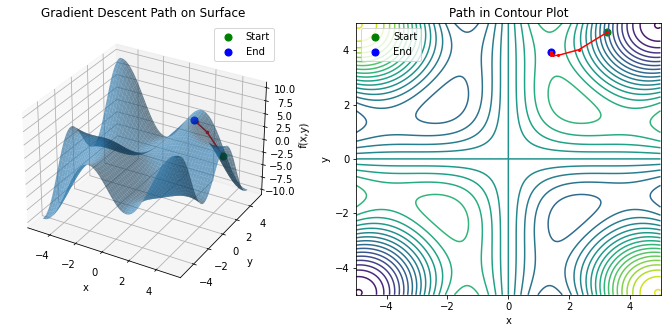

In [461]:
fig = plt.figure(figsize=(12, 5))

# 3D Surface Plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

ax1.plot_surface(X, Y, Z, alpha=0.6)
ax1.plot(path[:,0], path[:,1], f(path[:,0], path[:,1]), 'r.-', markersize=5)
# Startpunkt grün, Endpunkt blau
ax1.scatter(path[0,0], path[0,1], f(path[0,0], path[0,1]), color='green', s=50, label='Start')
ax1.scatter(path[-1,0], path[-1,1], f(path[-1,0], path[-1,1]), color='blue', s=50, label='End')

ax1.set_title("Gradient Descent Path on Surface")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("f(x,y)")
ax1.legend()

# Contour Plot
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(X, Y, Z, levels=30)
ax2.plot(path[:,0], path[:,1], 'r.-', markersize=4)
# Start- und Endpunkte
ax2.scatter(path[0,0], path[0,1], color='green', s=50, label='Start')
ax2.scatter(path[-1,0], path[-1,1], color='blue', s=50, label='End')
ax2.set_title("Path in Contour Plot")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()

plt.show()